# Business Case Study - Streaming Platform

Name - Avesh Raza Nagauri
Gmail - aveshnagauri5@gmail.com
Mobile - 9082425683

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
# Loading the data

df = pd.read_csv("netflix.csv")

In [ ]:
df.shape # the dataset has 5398 rows and 12 columns

(5398, 12)

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.dtypes

show_id          object
type             object
title            object
director         object
cast             object
country          object
date_added       object
release_year    float64
rating           object
duration         object
listed_in        object
description      object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5398 entries, 0 to 5397
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       5398 non-null   object 
 1   type          5398 non-null   object 
 2   title         5397 non-null   object 
 3   director      3515 non-null   object 
 4   cast          4903 non-null   object 
 5   country       4735 non-null   object 
 6   date_added    5397 non-null   object 
 7   release_year  5397 non-null   float64
 8   rating        5397 non-null   object 
 9   duration      5397 non-null   object 
 10  listed_in     5397 non-null   object 
 11  description   5397 non-null   object 
dtypes: float64(1), object(11)
memory usage: 506.2+ KB


In [ ]:
# Unnesting the Director column

rest1 = df['director'].apply(lambda x: str(x).split(',')).tolist()
dt_new1 = pd.DataFrame(rest1,index = df['title'])

dt_new1 = dt_new1.stack()

dt_new1 = pd.DataFrame(dt_new1.reset_index())
dt_new1.rename(columns = {0:'Directors'}, inplace = True)
dt_new1.drop(['level_1'], axis = 1, inplace = True)

dt_new1.head(10)

,title,Directors
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
5,Midnight Mass,Mike Flanagan
6,My Little Pony: A New Generation,Robert Cullen
7,My Little Pony: A New Generation,José Luis Ucha
8,Sankofa,Haile Gerima
9,The Great British Baking Show,Andy Devonshire


In [ ]:
#Unnesting the cast column

rest2 = df['cast'].apply(lambda x: str(x).split(',')).tolist()
dt_new2 = pd.DataFrame(rest2,index = df['title'])

dt_new2 = dt_new2.stack()

dt_new2 = pd.DataFrame(dt_new2.reset_index())
dt_new2.rename(columns = {0:'Actors'}, inplace = True)
dt_new2.drop(['level_1'],axis = 1, inplace = True)

dt_new2.head()

,title,Actors
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [ ]:
#Unnesting the country column

rest3 = df['country'].apply(lambda x: str(x).split(',')).tolist()
dt_new3 = pd.DataFrame(rest3, index = df['title'])

dt_new3 = dt_new3.stack()

dt_new3 = pd.DataFrame(dt_new3.reset_index())
dt_new3.rename(columns = {0:'Country'},  inplace = True)
dt_new3.drop(['level_1'], axis = 1, inplace = True)

dt_new3.head()

,title,Country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India


In [ ]:
#Unnesting the listed_in column

rest4 = df['listed_in'].apply(lambda x: str(x).split(',')).tolist()
dt_new4 = pd.DataFrame(rest4, index = df['title'])

dt_new4 = dt_new4.stack()

dt_new4 = pd.DataFrame(dt_new4.reset_index())
dt_new4.rename(columns = {0:'listed_in'},  inplace = True)
dt_new4.drop(['level_1'], axis = 1, inplace = True)

dt_new4.head(10)

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
5,Ganglands,International TV Shows
6,Ganglands,TV Action & Adventure
7,Jailbirds New Orleans,Docuseries
8,Jailbirds New Orleans,Reality TV
9,Kota Factory,International TV Shows


In [ ]:
# merging the unnested director data with unnested actors data
dt_new5 = dt_new2.merge(dt_new1, on = ['title'],how = 'inner')

# merging the above merged data with unnested country data
dt_new6 = dt_new5.merge(dt_new3, on = ['title'], how = 'inner')

#  merging the above merged data with unnested genre data i.e. listed_in column
dt_new7 =dt_new6.merge(dt_new4, on = ['title'], how = 'inner')

# Replacing nan values of Actor and Director by Unknown Actor and Director
dt_new7['Directors'].replace(['nan'], ['Unknown Director'], inplace = True)
dt_new7['Actors'].replace(['nan'], ['Unknown Actor'], inplace = True)
dt_new7['Country'].replace(['nan'],[np.nan], inplace = True)

dt_new7.head()

,title,Actors,Directors,Country,listed_in
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,United States,Documentaries
1,Blood & Water,Ama Qamata,Unknown Director,South Africa,International TV Shows
2,Blood & Water,Ama Qamata,Unknown Director,South Africa,TV Dramas
3,Blood & Water,Ama Qamata,Unknown Director,South Africa,TV Mysteries
4,Blood & Water,Khosi Ngema,Unknown Director,South Africa,International TV Shows


In [ ]:
# Merging our unnested data with original data

dt_final = dt_new7.merge(df[['show_id','type', 'title' ,'date_added','release_year',
                             'rating', 'duration', 'description']], on = ['title'], how = 'left')

dt_final.head()

,title,Actors,Directors,Country,listed_in,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,United States,Documentaries,s1,Movie,"September 25, 2021",2020.0,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,Ama Qamata,Unknown Director,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021.0,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Ama Qamata,Unknown Director,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021.0,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Ama Qamata,Unknown Director,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021.0,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Khosi Ngema,Unknown Director,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021.0,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


In [ ]:
# Filling the null values in continous column with 0 and categorical column with Unknown "column_name"

dt_final['release_year'].fillna(0, inplace = True)
dt_final['rating'].fillna('Unkown Rating', inplace = True)
dt_final['description'].fillna('Unkown Description', inplace = True)
dt_final['duration'].fillna('Unkown Duration', inplace = True)
dt_final['title'].fillna('Unkown Title', inplace = True)


In [ ]:
# counts of each categorical variable using non-graphical analysis.

dt_final['title'].value_counts().to_frame().head()


,title
The Eddy,416
Narcos,378
"Sincerely Yours, Dhaka",330
Olmo & the Seagull,300
Creeped Out,282


In [ ]:
dt_final['Actors'].value_counts().to_frame().head()

,Actors
Unknown Actor,1248
Anupam Kher,73
Takahiro Sakurai,67
Tara Strong,59
Yuki Kaji,59


In [ ]:
dt_final['Directors'].value_counts().to_frame().head()

,Directors
Unknown Director,38731
Youssef Chahine,409
Cathy Garcia-Molina,326
Raja Gosnell,288
Tom Hooper,240


In [ ]:
dt_final['listed_in'].value_counts().to_frame().head()

,listed_in
International Movies,16930
Dramas,10845
Comedies,7792
TV Dramas,6362
Action & Adventure,6242


In [ ]:
'''
Our analysis reveals that International Movies is the genre category with the highest number of
Netflix movie titles, amounting to 16,930 movies.Following this, the next most prevalent genres are
Dramas with 10,845 titles, Comedies with 7,792, TV Dramas with 6,363, and Action & Adventure with 6,242 titles.
These top five genres reflect Netflix's commitment to offering a diverse array of content, catering to various
viewer preferences and tastes across the global audience.
'''

In [ ]:
dt_final['release_year'].value_counts().to_frame().head()

,release_year
2019.0,20411
2018.0,19739
2020.0,19644
2021.0,11888
2017.0,11664


In [ ]:
'''
Our analysis of Netflix's content release history demonstrates that the year 2019 witnessed the highest number
of movie and TV show releases, totaling 20,411 titles. This prolific year is followed closely by 2018 with
19,739 releases, 2020 with 19,644, 2021 with 11,888, and 2017 with 11,664.
'''

In [ ]:
dt_final['date_added'].value_counts().to_frame().head()

,date_added
"July 1, 2021",2219
"September 1, 2021",1756
"June 2, 2021",1260
"October 1, 2018",1259
"August 1, 2021",1248


In [ ]:
'''
Our analysis reveals that July 1, 2021, emerges as the date with the highest number of Netflix movie
and TV show releases, totaling an impressive 2,219 titles. This particular date marks a significant
surge in content debuts, underscoring Netflix's strategic approach to content distribution and its ability to
captivate viewers with a diverse range of entertainment options.
'''

In [ ]:
dt_final['rating'].value_counts().to_frame().head()

,rating
TV-MA,53225
TV-14,29307
R,10720
TV-PG,9406
PG-13,6889


In [ ]:
'''
In our analysis, we find that the TV content rating 'TV-MA' holds the top position as the most frequently
assigned rating for Netflix TV shows and movies, with a total of 53,225 occurrences. Following closely
is the 'TV-14' rating, which is the second most prevalent rating, appearing 29,307 times. These ratings
play a crucial role in providing guidance to viewers, ensuring that they can make informed decisions
about the content they choose to watch on the platform.
'''

In [ ]:
dt_final['duration'].value_counts().to_frame().head()

,duration
1 Season,26765
2 Seasons,7567
3 Seasons,4042
102 min,2284
94 min,2259


In [ ]:
dt_final['show_id'].value_counts().to_frame().head()

,show_id
s2554,416
s5306,378
s3125,330
s3543,300
s3450,282


In [ ]:
type_counts = dt_final['type'].value_counts().to_frame()

,type
Movie,80247
TV Show,43649


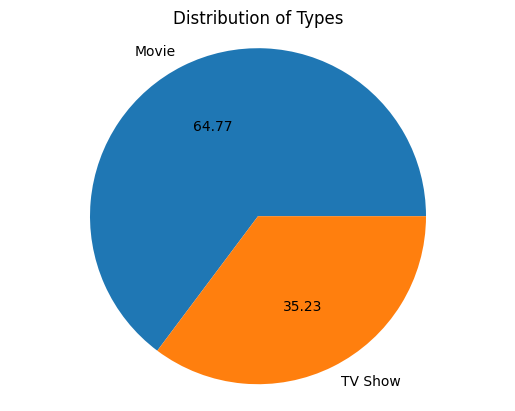

In [ ]:
# Create a pie chart with the red color palette

plt.pie(type_counts, labels=type_counts.index, autopct='%.2f')

plt.title('Distribution of Types')
plt.axis('equal')
plt.show()



In [ ]:
'''
In our analysis, it is revealed that Netflix has produced a total of 145,917 movies,
significantly outnumbering its TV show offerings, which amount to 56,148. This stark
contrast highlights Netflix's robust emphasis on movie production, which plays a central role
in its content strategy. The substantial number of movies produced underlines Netflix's
commitment to providing a vast and diverse collection of films to cater to the varied preferences
of its global audience.
'''

In [ ]:
# Resetting the index and converting it into a dataframe
top5_title = dt_final['title'].value_counts().reset_index().head()
top5_actors = dt_final['Actors'].value_counts().reset_index().head()
top5_director = dt_final['Directors'].value_counts().reset_index().head()
top5_country = dt_final['Country'].value_counts().reset_index().head()
top5_listed_in = dt_final['listed_in'].value_counts().reset_index().head()
top5_show_id = dt_final['show_id'].value_counts().reset_index().head()
top5_date_added = dt_final['date_added'].value_counts().reset_index().head()
top5_release_year = dt_final['release_year'].value_counts().reset_index().head()
top5_rating = dt_final['rating'].value_counts().reset_index().head()
top5_duration = dt_final['duration'].value_counts().reset_index().head()

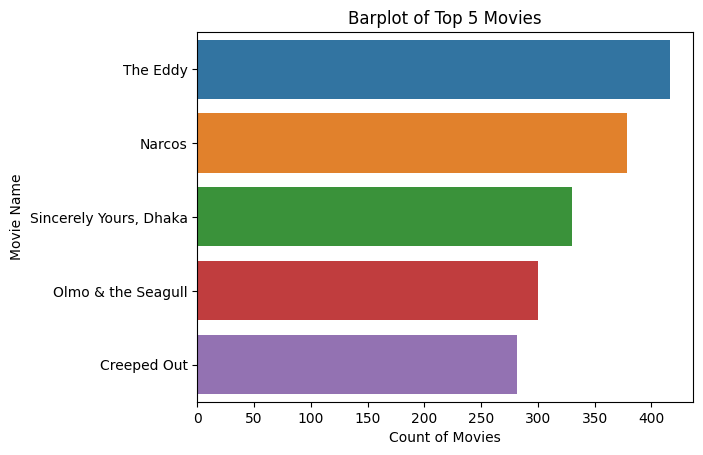

<Figure size 5000x4000 with 0 Axes>

In [ ]:
#Finding the counts of each categorical variable using graphical analysis.
# Counting a barplot for every categorical column
#Barplot for top 5 movies

sns.barplot(x = 'title', y = 'index',  data = top5_title)

plt.title('Barplot of Top 5 Movies')
plt.xlabel('Count of Movies')
plt.ylabel('Movie Name')

plt.figure(figsize=(50, 40))
plt.show()



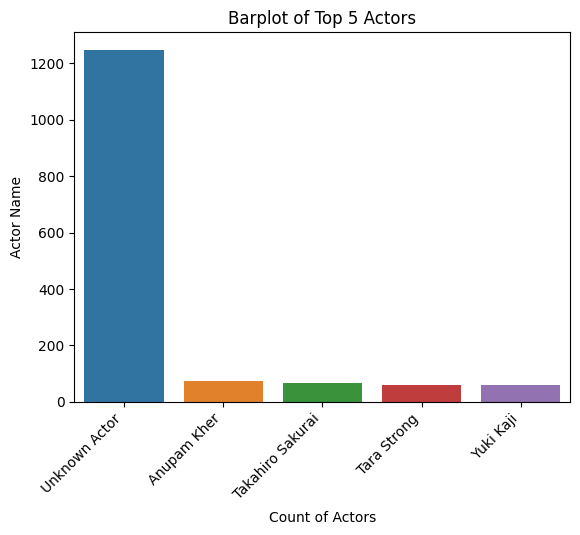

<Figure size 2000x600 with 0 Axes>

In [ ]:
#Barplot for top 5 Actors

sns.barplot(x = 'index', y = 'Actors',  data = top5_actors)

plt.title('Barplot of Top 5 Actors')
plt.xlabel('Count of Actors')
plt.ylabel('Actor Name')

plt.xticks(rotation=45, ha='right')
plt.figure(figsize=(20, 6))
plt.show()

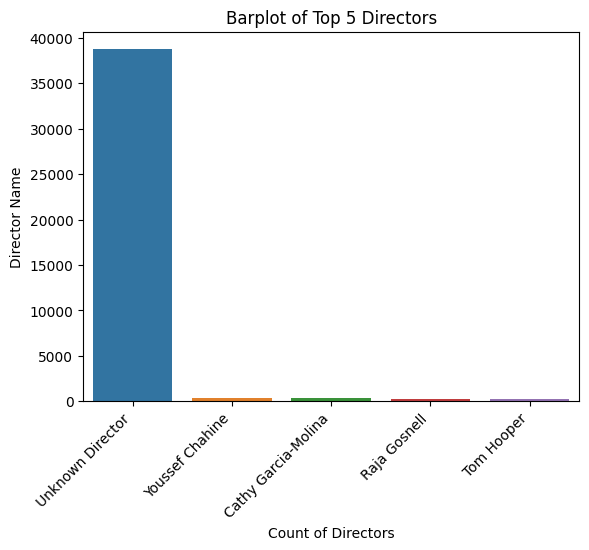

<Figure size 5000x4000 with 0 Axes>

In [ ]:
#Barplot for top 5 Directors

sns.barplot(x = 'index', y = 'Directors',  data = top5_director)

plt.title('Barplot of Top 5 Directors')
plt.xlabel('Count of Directors')
plt.ylabel('Director Name')

plt.xticks(rotation=45, ha='right')
plt.figure(figsize=(50, 40))
plt.show()

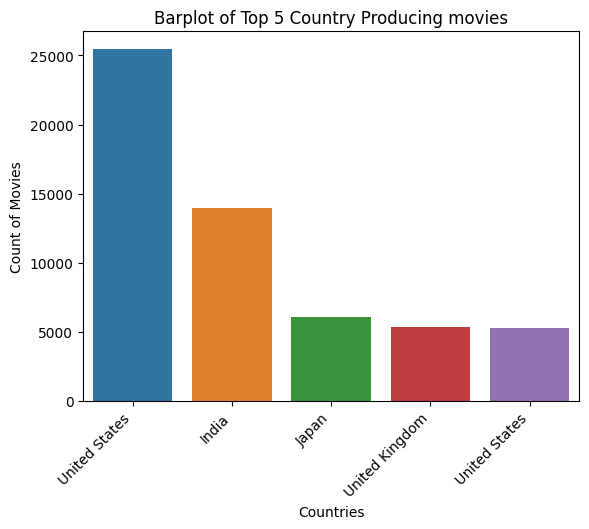

<Figure size 5000x4000 with 0 Axes>

In [ ]:
#Barplot of Top 5 Country Producing movies

sns.barplot(x = 'index', y = 'Country',  data = top5_country)

plt.title('Barplot of Top 5 Country Producing movies')
plt.xlabel('Countries')
plt.ylabel('Count of Movies')

plt.xticks(rotation=45, ha='right')
plt.figure(figsize=(50, 40))
plt.show()

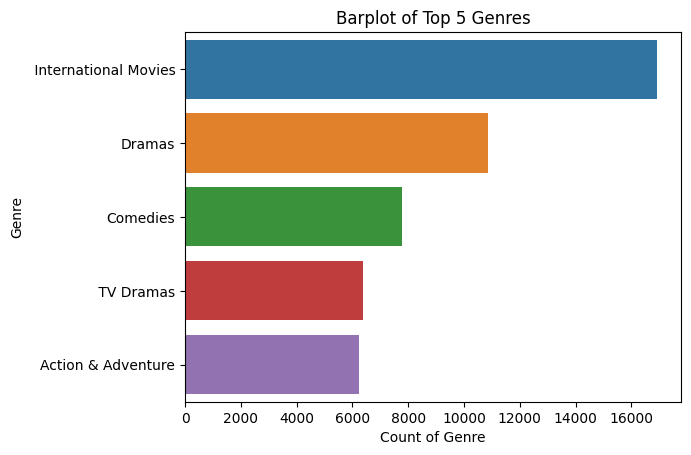

<Figure size 5000x4000 with 0 Axes>

In [ ]:
#Barplot of Top 5 Genres

sns.barplot(x = 'listed_in', y = 'index',  data = top5_listed_in)

plt.title('Barplot of Top 5 Genres')
plt.xlabel('Count of Genre')
plt.ylabel('Genre')

plt.figure(figsize=(50, 40))
plt.show()

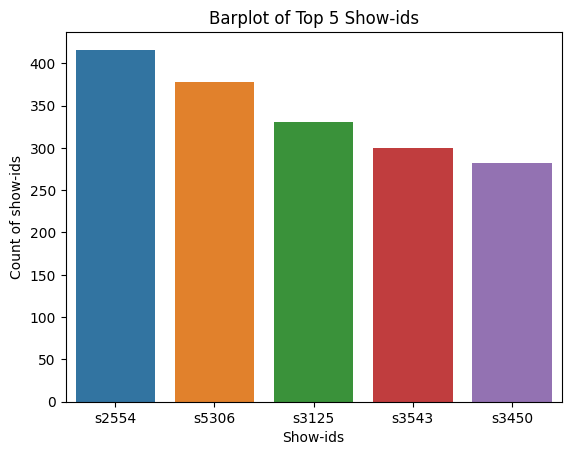

<Figure size 5000x4000 with 0 Axes>

In [ ]:
#Barplot of Top 5 Show-ids

sns.barplot(x = 'index', y = 'show_id',  data = top5_show_id)

plt.title('Barplot of Top 5 Show-ids')
plt.xlabel('Show-ids')
plt.ylabel('Count of show-ids')

plt.figure(figsize=(50, 40))
plt.show()

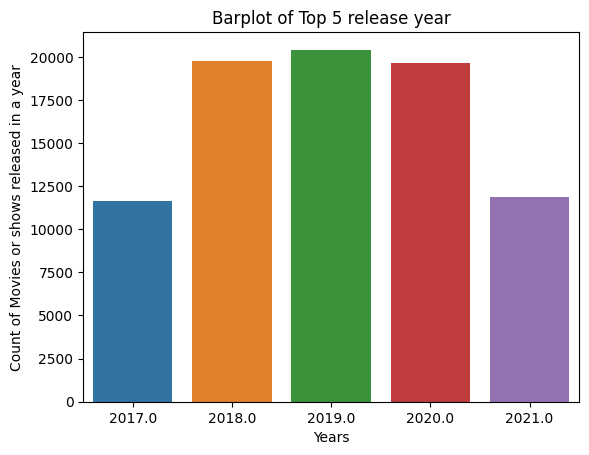

<Figure size 5000x4000 with 0 Axes>

In [ ]:
#Barplot of Top 5 release year

sns.barplot(x = 'index', y = 'release_year',  data = top5_release_year)

plt.title('Barplot of Top 5 release year')
plt.xlabel('Years')
plt.ylabel('Count of Movies or shows released in a year')

plt.figure(figsize=(50, 40))
plt.show()

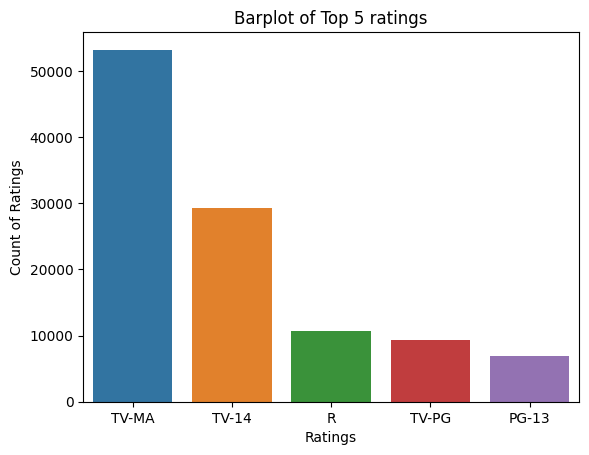

<Figure size 5000x4000 with 0 Axes>

In [ ]:
#Barplot of Top 5 ratings

sns.barplot(x = 'index', y = 'rating',  data = top5_rating)

plt.title('Barplot of Top 5 ratings')
plt.xlabel('Ratings')
plt.ylabel('Count of Ratings')

plt.figure(figsize=(50, 40))
plt.show()

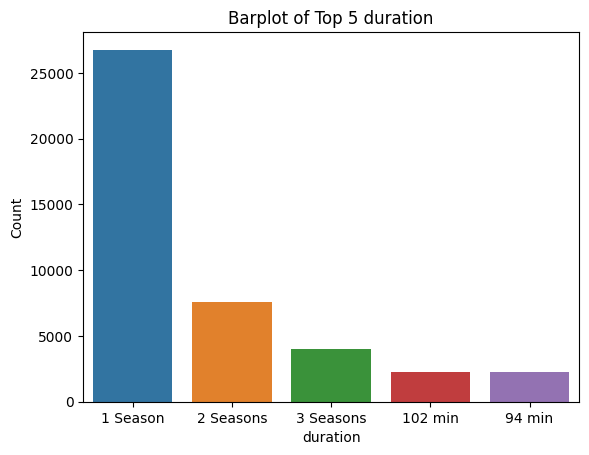

<Figure size 5000x4000 with 0 Axes>

In [ ]:
#Barplot of Top 5 Duration

sns.barplot(x = 'index', y = 'duration',  data = top5_duration, dodge = 100)

plt.title('Barplot of Top 5 Duration')
plt.xlabel('duration')
plt.ylabel('Count')

plt.figure(figsize=(50, 40))
plt.show()

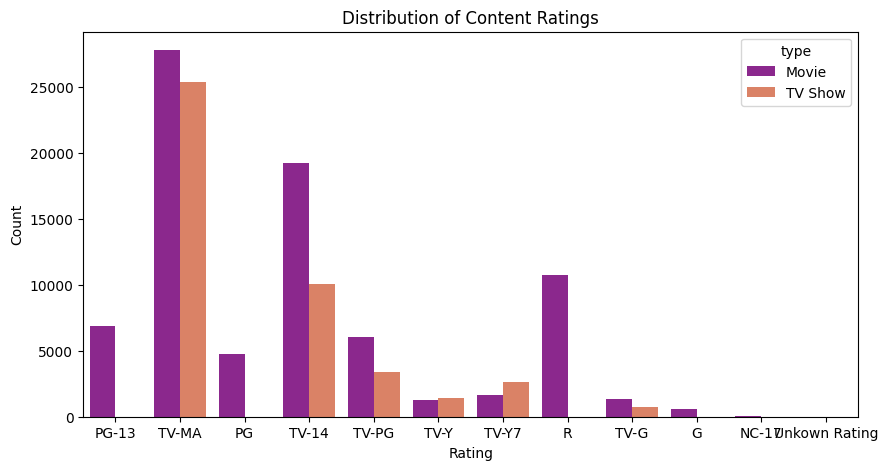

In [ ]:
# Countplot for Distribution of Content Ratings

sns.countplot(x = 'rating', hue = 'type', data = dt_final, palette = 'plasma')

plt.title('Distribution of Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.figure(figsize=(10,5))
plt.show()

In [ ]:
#Removing the spaces between strings from Country column

dt_final['Country'] = dt_final['Country'].str.strip()

In [ ]:
# Find the number of movies produced in each country and pick the top 10 countries.

only_movie = dt_final[dt_final['type'] == 'Movie']
unique_values = only_movie.groupby('Country')['title'].unique()
total_unique_values = unique_values.apply(lambda x: len(x)).nlargest(10)
total_unique_values.reset_index()


,Country,title
0,United States,1303
1,India,589
2,United Kingdom,235
3,France,163
4,Canada,149
5,Spain,116
6,Germany,88
7,Japan,86
8,Nigeria,81
9,Philippines,72


In [ ]:
'''
In our analysis of Netflix's movie production by country, it is evident that the United States
leads with a significant contribution, producing 1303 movies. Following the United States, India
is the second most prolific country with 589 movie productions, while the United Kingdom ranks
third with 235 movies. France and Canada round out the top five with 163 and 149 movie productions,
respectively.These top five countries have played a pivotal role in shaping Netflix's extensive and
diverse movie library,reflecting the platform's commitment to offering a wide array of cinematic
experiences to its global audience.
'''

In [ ]:
# Find the number of Tv-Shows produced in each country and pick the top 10 countries.

only_show = dt_final[dt_final['type'] == 'TV Show']
unique_values = only_show.groupby('Country')['title'].unique()
total_unique_values = unique_values.apply(lambda x: len(x)).nlargest(10)
total_unique_values.reset_index()

,Country,title
0,United States,697
1,Japan,158
2,United Kingdom,149
3,South Korea,119
4,Canada,81
5,France,62
6,Spain,50
7,India,49
8,Australia,46
9,Mexico,43


In [ ]:
'''
In our analysis of Netflix's TV show production by country, it is evident that the United States
stands out as the most prolific contributor, with a remarkable 697 TV shows produced. Following
the United States, we find Japan with 158 TV show productions, the United Kingdom with 149,
South Korea with 119, and Canada with 81 TV show productions. These top five countries have
made substantial contributions to Netflix's diverse content library, showcasing a global array
of TV shows that cater to a wide range of viewer preferences.
'''

In [ ]:
#Converting date_added column into datetime datatype

dt_final['date_added'] = pd.to_datetime(dt_final['date_added'])

In [ ]:
#Adding 2 new columns week and month in the table

dt_final['Week'] = dt_final['date_added'].dt.week
dt_final['Month'] = dt_final['date_added'].dt.month


<ipython-input-60-4742f837610f>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  dt_final['Week'] = dt_final['date_added'].dt.week


In [ ]:
dt_final.head()

,title,Actors,Directors,Country,listed_in,show_id,type,date_added,release_year,rating,duration,description,country,Week,Month
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,United States,Documentaries,s1,Movie,2021-09-25,2020.0,PG-13,90 min,"As her father nears the end of his life, filmm...",United States,38.0,9.0
1,Blood & Water,Ama Qamata,Unknown Director,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021.0,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,38.0,9.0
2,Blood & Water,Ama Qamata,Unknown Director,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021.0,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,38.0,9.0
3,Blood & Water,Ama Qamata,Unknown Director,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021.0,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,38.0,9.0
4,Blood & Water,Khosi Ngema,Unknown Director,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021.0,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,38.0,9.0


In [ ]:
#Filtering by TV-shows and Movies

tv_shows = dt_final[dt_final['type'] == 'TV Show']
movies = dt_final[dt_final['type'] == 'Movie']

In [ ]:
# Grouping by type and week and reseting the index

grouped_data = dt_final.groupby(['type', 'Week']).size().reset_index(name='Count')
grouped_data.head()

,type,Week,Count
0,Movie,1.0,1412
1,Movie,2.0,777
2,Movie,3.0,1175
3,Movie,4.0,821
4,Movie,5.0,1422


In [ ]:
# Creating separate dataframes for TV shows and movies

tv_shows = grouped_data[grouped_data['type'] == 'TV Show']
movies = grouped_data[grouped_data['type'] == 'Movie']

In [ ]:
movies.sort_values('Count',ascending = False).head()

,type,Month,Count
6,Movie,7.0,8996
8,Movie,9.0,8508
3,Movie,4.0,7683
11,Movie,12.0,7116
7,Movie,8.0,7077


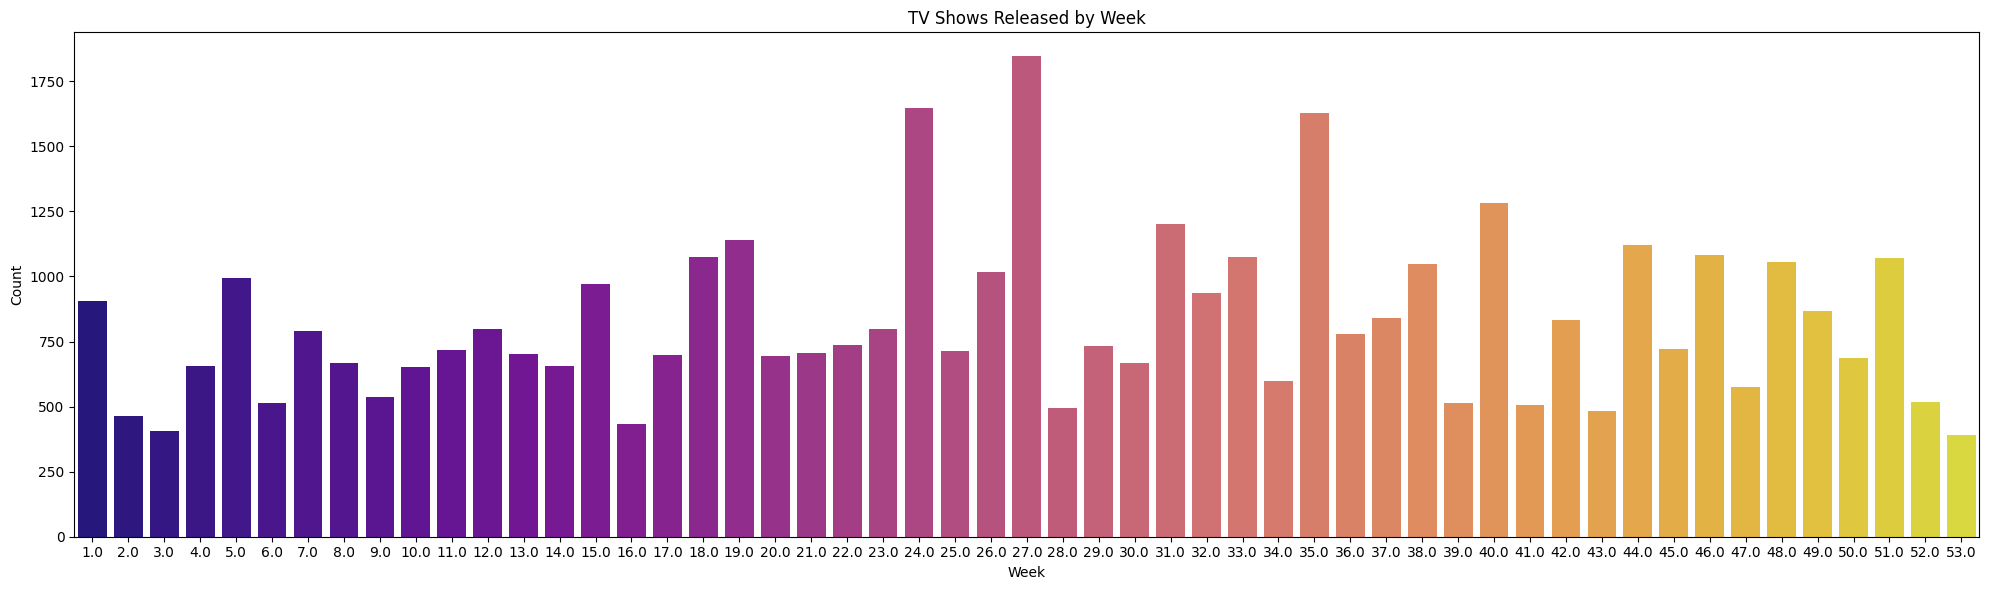

In [ ]:
# Creating count plots for TV shows by week

plt.figure(figsize=(20, 6))


sns.barplot(data=tv_shows, x='Week', y='Count', palette='plasma')
plt.title('TV Shows Released by Week')
plt.xlabel('Week')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:
'''
In our analysis of Netflix's TV show release schedule, we observe that the 27th week of the year
is particularly significant, with the highest number of TV show releases. The 24th week follows
closely as the second most active period for TV show debuts, and the 35th week ranks third in
terms of releases. Conversely, the last week of the year, designated as week 53, tends to have
the fewest TV show releases. This pattern underscores Netflix's strategy of strategically timing
TV show launches to coincide with peak periods of viewer engagement and entertainment preferences
while adjusting its content schedule during quieter weeks.
'''

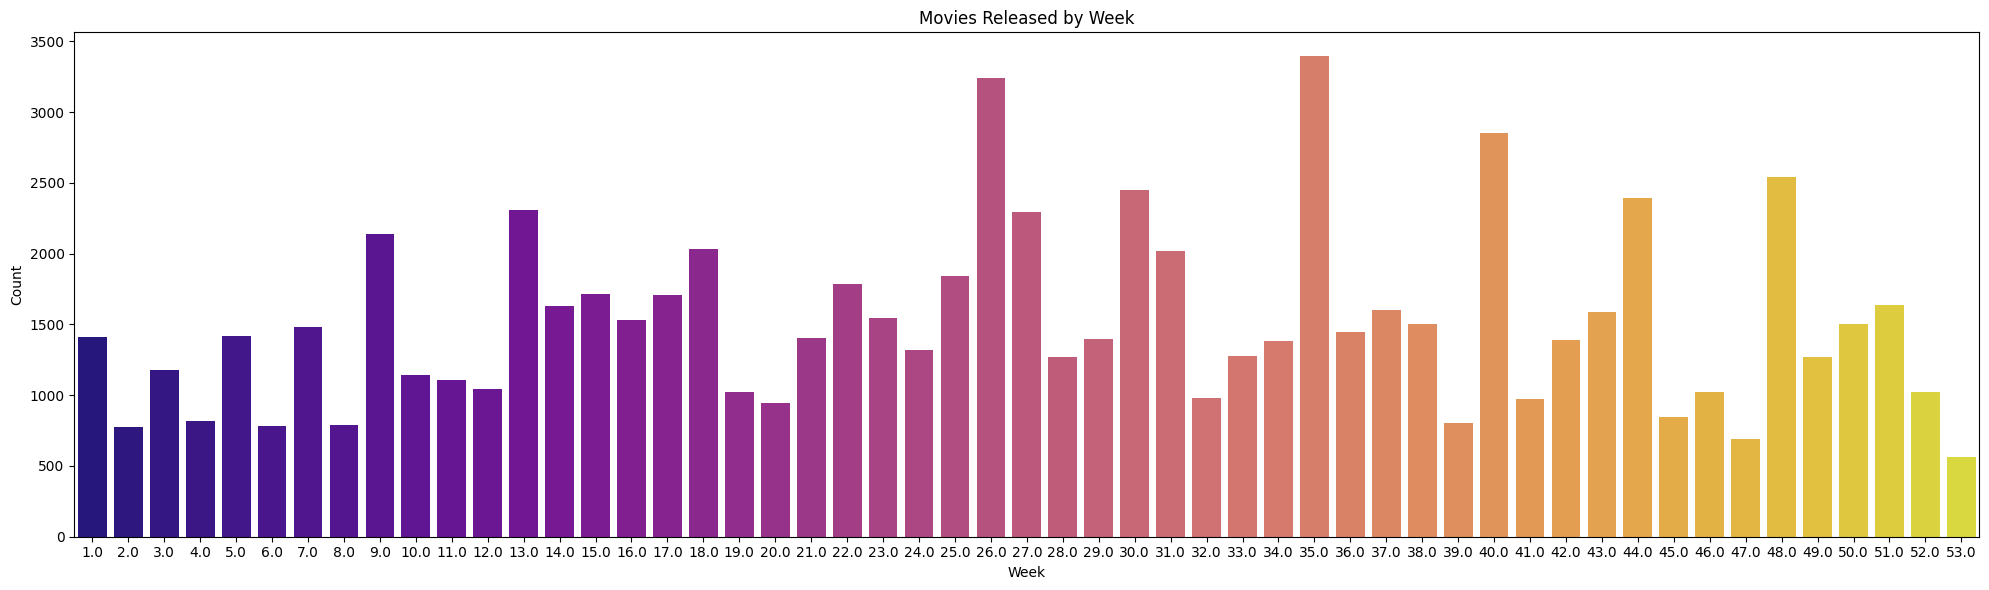

In [ ]:
# Creating count plots for movies by week

plt.figure(figsize=(20, 6))


sns.barplot(data=movies, x='Week', y='Count', palette='plasma')
plt.title('Movies Released by Week')
plt.xlabel('Week')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
'''
Our analysis of Netflix's content release patterns indicates that, similar to TV shows, movies
also exhibit a notable trend in their release schedule. Movies on Netflix tend to have a higher
number of releases during weeks within the range of 30 to 39, which aligns with the peak periods
of content debuts. In contrast, the last week of the year, which is typically labeled as week 53,
tends to have fewer movie releases. This trend reflects Netflix's strategy to optimize content
offerings during periods of heightened viewer engagement, while adjusting the release schedule
during quieter weeks. It underscores the platform's commitment to delivering a diverse and dynamic
library of movies throughout the year.
'''

In [ ]:
# Re-Grouping by type and Month and reseting the index

grouped_data = dt_final.groupby(['type', 'Month']).size().reset_index(name='Count')


In [ ]:
#Filtering Again

tv_shows = grouped_data[grouped_data['type'] == 'TV Show']
movies = grouped_data[grouped_data['type'] == 'Movie']

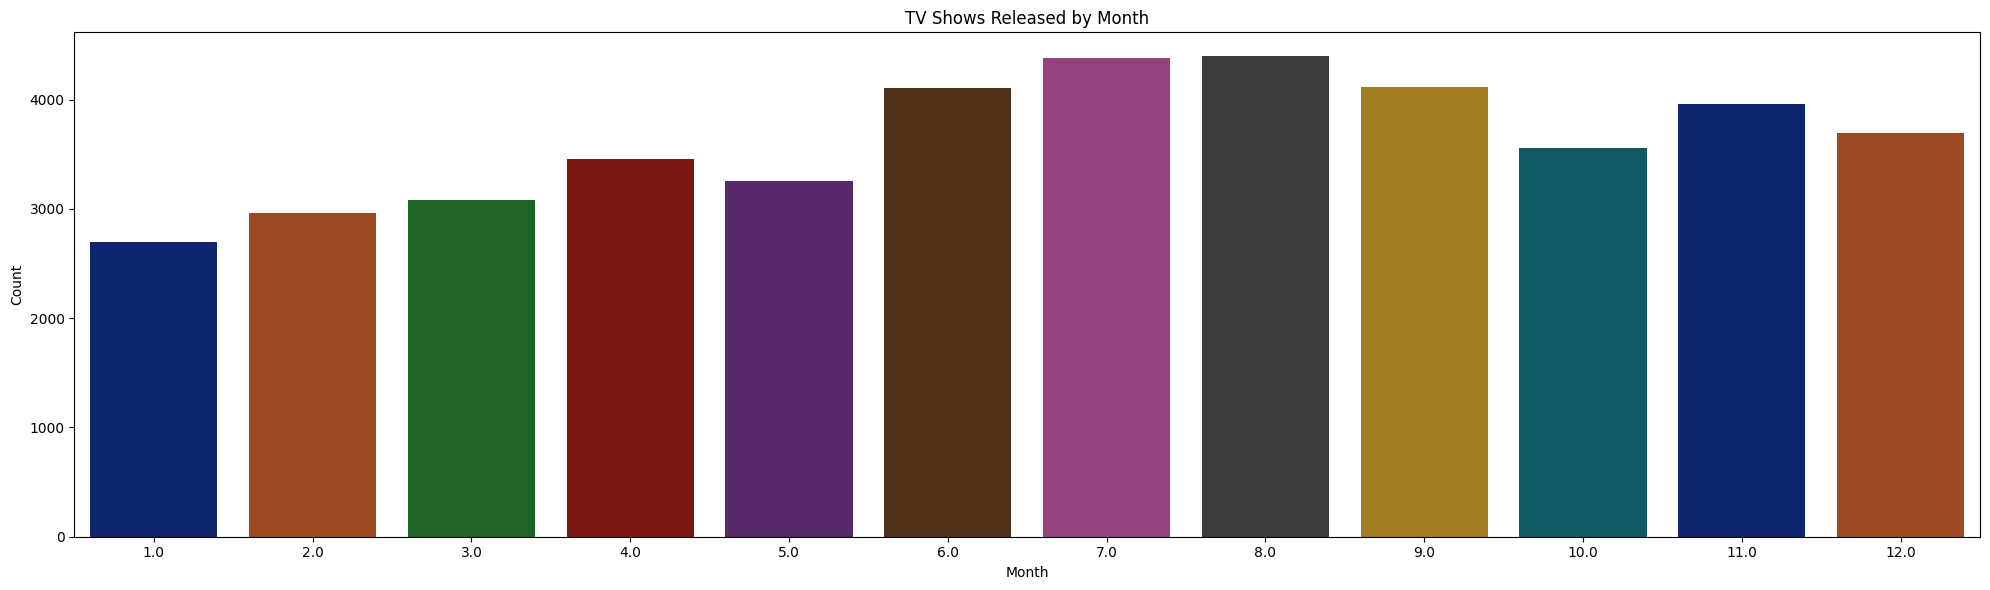

In [ ]:
# Creating count plots for TV shows by Month

plt.figure(figsize=(20, 6))


sns.barplot(data=tv_shows, x='Month', y='Count', palette='dark')
plt.title('TV Shows Released by Month')
plt.xlabel('Month')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
'''
Our analysis of Netflix's content release patterns reveals a notable trend in the streaming
platform's TV show releases. Specifically, Netflix tends to maximize its TV show releases during
the months of July and August, marking these months as peak periods for TV show debuts.
Conversely, the month of January sees the fewest TV show releases, reflecting a strategic adjustment
in content offerings during this time. This observation underscores Netflix's ability to adapt its
release schedule to cater to audience preferences and trends throughout the year.
'''

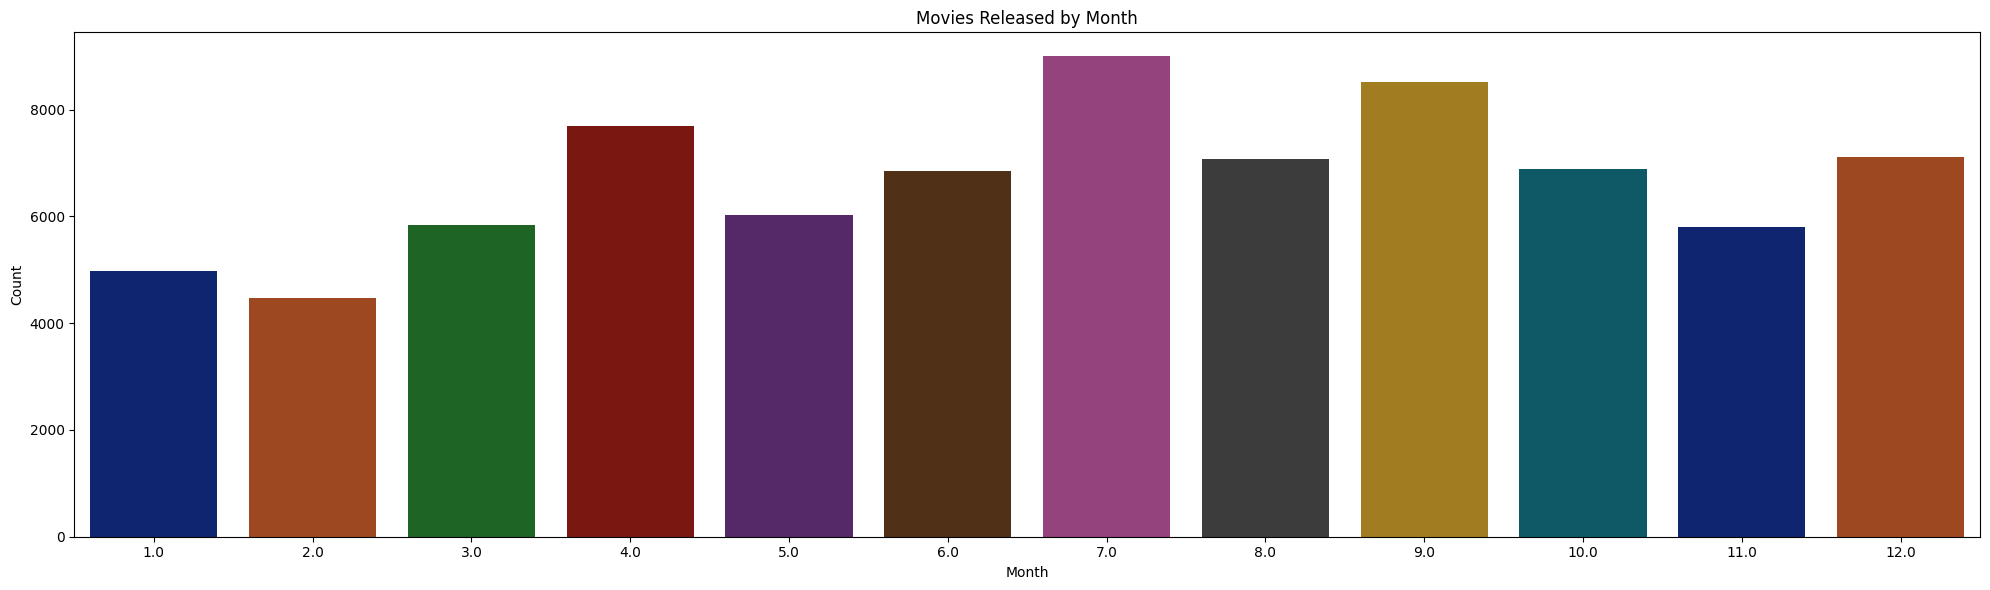

In [ ]:
# Creating count plots for movies by Month

plt.figure(figsize=(20, 6))


sns.barplot(data=movies, x='Month', y='Count', palette='dark')
plt.title('Movies Released by Month')
plt.xlabel('Month')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
'''
Our analysis of Netflix's release patterns reveals that the streaming platform consistently
launches a significant number of movies during the months of July and September, demonstrating
a peak in its release schedule during these periods. In contrast, February emerges as the month
with the lowest number of movie releases on Netflix. This observation highlights the platform's
strategic scheduling, with a focus on capturing the attention of viewers during peak seasons while
adjusting its release strategy during slower months. This strategic approach ensures that Netflix
continues to deliver a diverse range of content to its global audience throughout the year.
'''

In [ ]:
dt_final.head()

,title,Actors,Directors,Country,listed_in,show_id,type,date_added,release_year,rating,duration,description,Date,Week,Month
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,United States,Documentaries,s1,Movie,2021-09-25,2020.0,PG-13,90 min,"As her father nears the end of his life, filmm...",2021-09-25,38.0,9.0
1,Blood & Water,Ama Qamata,Unknown Director,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021.0,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021-09-24,38.0,9.0
2,Blood & Water,Ama Qamata,Unknown Director,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021.0,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021-09-24,38.0,9.0
3,Blood & Water,Ama Qamata,Unknown Director,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021.0,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021-09-24,38.0,9.0
4,Blood & Water,Khosi Ngema,Unknown Director,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021.0,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021-09-24,38.0,9.0


In [ ]:
# Analysis of actors/directors of different types of shows/movies.

#Grouping the actors with total unique titles

actor_count = dt_final.groupby('Actors')['title'].nunique()
top10_actors = actor_count.sort_values(ascending = False)
top10_actors = top10_actors.head(10).reset_index()
top10_actors

,Actors,title
0,Unknown Actor,495
1,Rajesh Kava,25
2,Takahiro Sakurai,25
3,Anupam Kher,24
4,Jigna Bhardwaj,22
5,Julie Tejwani,22
6,Rupa Bhimani,22
7,Junichi Suwabe,20
8,Yuki Kaji,20
9,Vincent Tong,20


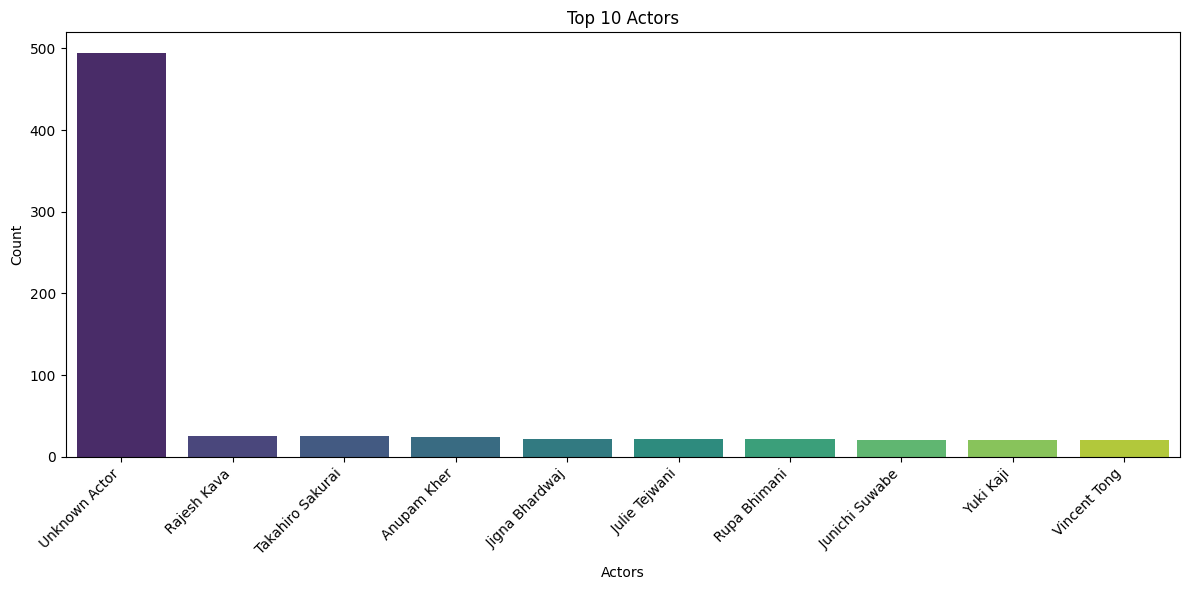

In [ ]:
# Barplot for top10 Actors

plt.figure(figsize=(12, 6))


sns.barplot(data=top10_actors, x='Actors', y='title', palette='viridis')


plt.title('Top 10 Actors')
plt.xlabel('Actors')
plt.ylabel('Count')


plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()


In [ ]:
'''
Our analysis reveals that the actors Rajesh Kava and Takahiro Sakurai share the distinction
of being the most prolific actors in Netflix productions, each with an impressive tally of
25 acting credits. Following closely are Anupam Kher with 24 acting roles and Jigna Bharadwaj
with 22, making them notable contributors to the rich and diverse world of characters featured
in Netflix movies and TV shows. These actors' dedication to their craft has significantly enriched
the streaming platform's content offerings.
'''

In [ ]:
#Grouping the directors with total unique titles

director_count = dt_final.groupby('Directors')['title'].nunique()
top10_directors = director_count.sort_values(ascending = False)
top10_directors = top10_directors.head(10).reset_index()
top10_directors

,Directors,title
0,Unknown Director,1883
1,Rajiv Chilaka,19
2,Suhas Kadav,15
3,Raúl Campos,14
4,Jan Suter,14
5,Marcus Raboy,13
6,Youssef Chahine,12
7,Cathy Garcia-Molina,12
8,Jay Chapman,9
9,Don Michael Paul,8


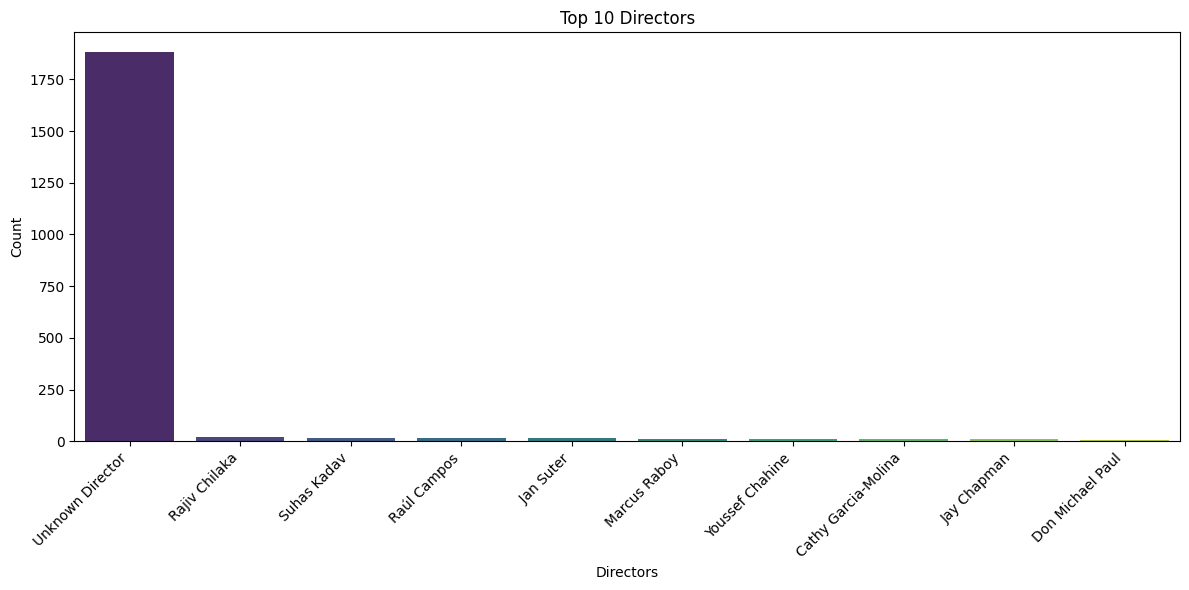

In [ ]:
# Barplot for top10 Actors

plt.figure(figsize=(12, 6))


sns.barplot(data=top10_directors, x='Directors', y='title', palette='viridis')


plt.title('Top 10 Directors')
plt.xlabel('Directors')
plt.ylabel('Count')


plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()


In [ ]:
'''
In our analysis, it is evident that the most prolific director for Netflix, based on available data,
is Rajiv Chilaka, who has contributed to a remarkable 19 productions. Following closely, we find
Suhas Kadav with 15 directorial credits, and both Rahul Campos and Jan Sulter with 14 directorial
contributions each. These talented directors have played a pivotal role in shaping Netflix's content
portfolio, underscoring the diverse creative talents that contribute to the platform's extensive library
of movies and TV shows.
'''

In [ ]:
# Which genre movies are more popular or produced more

# Grouping the listed_in column and counting titles

dt_final['listed_in'] = dt_final['listed_in'].str.strip()    #removing the space between strings
result = dt_final.groupby('listed_in')['title'].count()
result = result.sort_values(ascending = False)
result.reset_index().head(10)

,listed_in,title
0,Dramas,29806
1,International Movies,28243
2,Comedies,20829
3,International TV Shows,12845
4,Action & Adventure,12216
5,Independent Movies,9834
6,Children & Family Movies,9771
7,TV Dramas,8942
8,Thrillers,7107
9,Romantic Movies,6412


In [ ]:
dt_final['listed_in'].count()

123896

In [ ]:
'''
In our analysis, it is apparent that Netflix stands out as a prolific producer of content across
various genres. Notably, genres such as Dramas (29806), International Movies (28243), Comedies (20829),
International TV Shows (12845), and Action & Adventure (12216) rank among the top categories in which
Netflix excels. These substantial numbers reflect Netflix's commitment to delivering a diverse array
of content that resonates with a global audience, underscoring its position as a leading provider of
entertainment in the industry.
'''

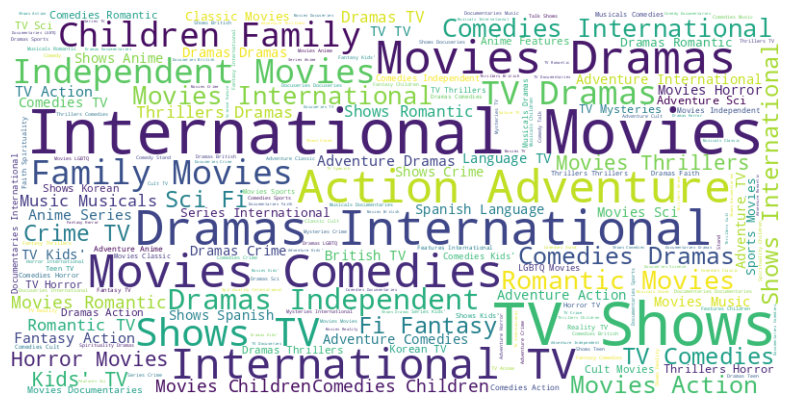

In [ ]:
#Applying word cloud on the listed_in columns to know which kind of genre is produced


genre_text = ' '.join(dt_final['listed_in'].dropna())  # Concatenate all genre values into a single string

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genre_text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
'''
In our comprehensive analysis, it becomes evident that Netflix demonstrates a robust production portfolio,
marked by a significant emphasis on content categories such as Dramas, International Movies, Comedies,
International TV Shows, Action, and Adventure. These genres represent pivotal areas of focus in Netflix's
content strategy, underpinning its commitment to offering diverse and engaging entertainment options for
its global audience. This strategic emphasis on a wide array of content genres is a testament to Netflix's
agility and adaptability in catering to the preferences and demands of its viewers worldwide.
'''

In [ ]:
# Q:- Finding After how many days the movie will be added to Netflix after the release of
#     the movie

dt_final['date_added'] = pd.to_datetime(dt_final['date_added'])

# Calculating the time difference in days between 'date_added' and the release year
dt_final['days_to_netflix'] = (dt_final['date_added'] - pd.to_datetime(dt_final['release_year'],
                                                                       format='%Y')).dt.days

# Getting the average and median days it takes for movies to be added to Netflix
average_days = dt_final['days_to_netflix'].mean().round(2)
mode_days = dt_final['days_to_netflix'].mode().values[0]


print(f"Average days to Netflix: {average_days} days")

print(f"Mode days to Netflix: {mode_days} days")

Average days to Netflix: 2196.2 days
Mode days to Netflix: 547.0 days


In [ ]:
'''
In our comprehensive business case study, we have observed that Netflix typically exhibits an approximate
delay of 547 days in incorporating a newly released movie onto its platform. This insightful finding
underscores the strategic approach Netflix employs in content acquisition and highlights the substantial
time gap between a movie's initial release and its availability to Netflix subscribers. This significant
temporal disparity is anoteworthy aspect of the streaming industry and has implications for both Netflix's
content acquisition strategy and the expectations of its user base.
'''

# **Recommendations For Netflix**

In [ ]:
'''
To further enhance its subscribers experience and attract more subscribers, Netflix can consider the following
strategies:

1. Diverse Content Production: Continue producing a wide variety of content, especially in popular genres
   like International Movies, Dramas, Comedies, TV Dramas, and Action & Adventure, to cater to the diverse
   preferences of global audiences.

2. Content Scheduling: Optimize content release schedules to coincide with peak viewer engagement periods,
   both for TV shows and movies, to maintain consistent viewer interest.

3. Global Expansion: Focus on expanding its presence in countries such as India and other markets with strong
   growth potential, recognizing the importance of regional content to attract local subscribers.

4. Content Ratings: Continue to provide accurate content ratings and parental controls to help viewers make
   informed choices, enhancing their trust in the platform.

5. Prolific Directors and Actors: Collaborate with prolific directors and actors like Rajiv Chilaka, Takahiro
   Sakurai, Anupam Kher, and Jigna Bharadwaj, who have a strong track record in creating content that
   resonates with viewers.

6. Enhanced Search and Recommendation Algorithms: Improve search and recommendation algorithms to help
   subscribers discover content tailored to their individual preferences, making the viewing experience
   more personalized.

7. Seasonal Strategies: Strategically time content releases during holidays and peak seasons, taking
   advantage of viewer downtime for increased engagement.

8. Content Rating Balance: Maintain a balance between producing content across different content ratings
   (e.g., TV-MA and TV-14) to cater to a wide age range of subscribers.

9. Feedback Integration: Encourage user feedback and incorporate it into marketing strategies, demonstrating
   that Netflix values its viewers opinions.

10. Innovative Genres: Explore new and innovative genres to stay ahead of emerging content trends and cater
    to niche audiences.

11. Community Building: Foster online communities, forums, or social media groups where subscribers can share
    their experiences and recommendations, enhancing user engagement.

12. Netflix, recognizing the challenge of raising subscription fees, particularly in price-sensitive markets
    like India, can seek alternative revenue sources. One innovative avenue is the establishment of amusement
    parks inspired by its iconic characters, movies, and shows. These physical parks offer a unique
    opportunity for people to immerse themselves in the world of Netflix, creating an additional revenue
    stream. This diversification strategy extends Netflix's reach beyond the digital platform, engaging
    audiences in exciting and interactive ways.


These strategies can help Netflix further solidify its position in the streaming industry, offer a compelling
and diverse content library, and attract more subscribers while retaining its existing user base.

'''